# Unit01｜Python 工具打底 + 基本 EDA

對應講義：`Part_1/Unit01_Python_EDA_Basics.md`


In [1]:
# ===== Shared environment (repo-root + outputs/) =====
import os, sys
from pathlib import Path

IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=False)

def find_repo_root(start=None):
    start = Path(start or os.getcwd()).resolve()
    for p in [start] + list(start.parents):
        if (p / 'Jupyter_Scripts').is_dir():
            return p
    if IN_COLAB:
        candidate = Path('/content/drive/MyDrive/ChemEng_AI_Course_Materials')
        if (candidate / 'Jupyter_Scripts').is_dir():
            return candidate
    return start

REPO_ROOT = find_repo_root()
# Part_1 課程結果儲存在 Part_1 資料夾內
PART1_DIR = REPO_ROOT / 'Part_1'
OUTPUT_DIR = PART1_DIR / 'Unit01_Results'
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
os.chdir(PART1_DIR)
print('REPO_ROOT:', REPO_ROOT)
print('PART1_DIR:', PART1_DIR)
print('Working dir:', os.getcwd())
print('Results will be saved to:', OUTPUT_DIR)


REPO_ROOT: G:\我的雲端硬碟\FCU\課程\ChemEng_AI_Course_Materials
PART1_DIR: G:\我的雲端硬碟\FCU\課程\ChemEng_AI_Course_Materials\Part_1
Working dir: G:\我的雲端硬碟\FCU\課程\ChemEng_AI_Course_Materials\Part_1
Results will be saved to: G:\我的雲端硬碟\FCU\課程\ChemEng_AI_Course_Materials\Part_1\Unit01_Results


In [2]:
# 匯入必要的套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

def configure_warnings():
    # 僅忽略常見非關鍵警告，避免過度隱藏重要訊息
    warnings.filterwarnings('ignore', category=FutureWarning, module='pandas')
    warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')

configure_warnings()

# 建立結果儲存資料夾（已在上一個 cell 設定好路徑）
# os.makedirs('Unit01_Results', exist_ok=True)  # 不需要，已在上方創建

# 設定繪圖風格（支援中文顯示，方便標註物理量與單位）
sns.set(style='whitegrid')
#plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

print('套件載入完成！目前執行環境：Pandas', pd.__version__, 'NumPy', np.__version__)


套件載入完成！目前執行環境：Pandas 2.2.3 NumPy 1.26.4


## 1. NumPy 基礎操作 (NumPy Basics)

在進入 Pandas 之前，我們先熟悉 Python 資料科學的基石：NumPy。
機器學習模型（尤其是神經網路）輸入的不是 Excel 表格，而是多維陣列 (Tensors)。


### 1.1 向量化運算 (Vectorization)
**理論背景：SIMD 與 記憶體配置**

Python list vs NumPy ndarray 的核心差異：連續記憶體 + SIMD。

**練習目標**：
1. 建立一個簡單陣列並做逐元素運算。
2. 比較純 Python list comprehension 與 NumPy 向量化的耗時。

（下方新增效能簡測程式碼）

```python
import numpy as np
arr = np.array([10, 20, 30, 40])
print(arr * 2)  # [20 40 60 80]
```

In [3]:
# 1.1 向量化運算 (Vectorization) - 基本示範 + 效能比較
import numpy as np, timeit

arr = np.array([10, 20, 30, 40])
print("原始陣列:", arr)
print("向量化運算 arr * 2:", arr * 2)

# 效能比較：Python list vs NumPy ndarray
n = 1_000_000
py_list = list(range(n))
np_arr = np.arange(n)

t_list = timeit.timeit(stmt='[x*2 for x in py_list]', globals=globals(), number=5)
t_numpy = timeit.timeit(stmt='np_arr*2', globals=globals(), number=5)
print(f"Python list comprehension 耗時: {t_list:.4f}s (5 次)" )
print(f"NumPy 向量化耗時: {t_numpy:.4f}s (5 次)")
print("加速倍率 ≈", round(t_list / t_numpy, 2), "x")

# 提示：時間差異受平台 / CPU SIMD 支援影響

原始陣列: [10 20 30 40]
向量化運算 arr * 2: [20 40 60 80]
Python list comprehension 耗時: 0.4017s (5 次)
NumPy 向量化耗時: 0.0071s (5 次)
加速倍率 ≈ 56.74 x


In [4]:
import time

# 參數設定
A = 1e10          # 前指數因子 (1/s)
Ea = 50000        # 活化能 (J/mol)
R = 8.314         # 氣體常數 (J/(mol·K))
T_array = np.linspace(300, 400, 1000)  # 300K 到 400K，1000 個溫度點

# 方法一：使用迴圈（慢）
start = time.time()
k_loop = []
for T in T_array:
    k_loop.append(A * np.exp(-Ea / (R * T)))
k_loop = np.array(k_loop)
time_loop = time.time() - start

# 方法二：NumPy 向量化（快）
start = time.time()
k_vectorized = A * np.exp(-Ea / (R * T_array))
time_vectorized = time.time() - start

print(f"迴圈方法耗時：{time_loop*1000:.2f} ms")
print(f"向量化方法耗時：{time_vectorized*1000:.2f} ms")
if time_vectorized == 0:
    print("加速倍數：無限大（向量化方法耗時過短，無法計算）")
else:
    print(f"加速倍數：{time_loop / time_vectorized:.1f}x")
print(f"\n前 5 個溫度點的反應速率常數 (1/s)：")
print(k_vectorized[:5])

迴圈方法耗時：0.97 ms
向量化方法耗時：0.00 ms
加速倍數：無限大（向量化方法耗時過短，無法計算）

前 5 個溫度點的反應速率常數 (1/s)：
[19.67488662 19.80688607 19.9396822  20.07327924 20.20768146]


### 1.1.1 化工應用案例：Arrhenius 反應速率計算（向量化實戰）

假設你要計算不同溫度下的反應速率常數 $k = A e^{-E_a / RT}$，其中：
- $A$ = 前指數因子 (Pre-exponential factor)
- $E_a$ = 活化能 (Activation energy, J/mol)
- $R$ = 氣體常數 (8.314 J/(mol·K))
- $T$ = 溫度 (K)

**情境**：你需要掃描 1000 個溫度點，計算每個溫度的反應速率。

### 1.2 維度變換 (Reshape)
**理論背景：張量 (Tensor) 概念**

重點：不改變底層資料，只改變解讀維度。
- 0D: Scalar
- 1D: Vector
- 2D: Matrix
- 3D+: 影像 / 批次資料

**常見操作速記**：
- `reshape(a, b)`：指定新形狀
- `reshape(-1, d)`：自動推導一維
- `ravel()` / `flatten()`：展平成 1D
- `np.expand_dims(x, axis)`：插入新維度（例如新增 batch 維）

**練習目標**：
1. 將 784 長度向量變成 28×28。
2. 示範自動推導 `-1`。
3. 展平成一維再還原。
4. 新增 Batch 維度與 Channel 維度。

（下方新增程式演練）

In [5]:
# 1.2 維度變換 (Reshape) - 程式演練
import numpy as np

# 784 -> 28x28 (例如 MNIST 單張影像)
image_flat = np.arange(784)
image_2d = image_flat.reshape(28, 28)
print("image_flat shape:", image_flat.shape, "-> image_2d shape:", image_2d.shape)

# 使用 -1 自動推導：將 2D 還原為 1D
again_flat = image_2d.reshape(-1)
print("還原後 shape:", again_flat.shape)

# 新增 Batch 維度 (1, 28, 28)
batch_1 = np.expand_dims(image_2d, axis=0)
print("batch_1 shape:", batch_1.shape)

# 新增 Channel 維度 (1, 28, 28, 1)
batch_1_ch1 = np.expand_dims(batch_1, axis=-1)
print("batch_1_ch1 shape:", batch_1_ch1.shape, "(batch, H, W, C)")

# 驗證資料未被改變
assert np.array_equal(image_flat, batch_1_ch1.reshape(-1))
print("資料內容保持一致。")

# 小練習建議：
print("練習：請嘗試將 60x3 的 2D 矩陣改成 (3, 20, 3) 與 (20, 3, 3) 觀察差異。")

image_flat shape: (784,) -> image_2d shape: (28, 28)
還原後 shape: (784,)
batch_1 shape: (1, 28, 28)
batch_1_ch1 shape: (1, 28, 28, 1) (batch, H, W, C)
資料內容保持一致。
練習：請嘗試將 60x3 的 2D 矩陣改成 (3, 20, 3) 與 (20, 3, 3) 觀察差異。


### 1.3 化工資料中的張量思維

對應結構：
- 1D：單一感測器時間序列 T(t)
- 2D：多變量時間序列 X ∈ R^{time × feature}
- 3D：批次 × 時間 × 變數 (batch, time, feature)

**物理意義檢查清單**：
1. 每一維度代表什麼？(batch? time? variable?)
2. 是否有不等長批次？需要 padding / masking？
3. reshape 後是否混淆了實際時間順序？

---

In [6]:
# 1.3 製程資料的張量維度 - 擴充示範
import numpy as np

# 60 個時間點、3 個感測器 -> 2D
T, d = 60, 3
X_2d = np.random.randn(T, d)
print("2D shape (time, feature):", X_2d.shape)

# 分成 3 個批次，每批 20 時間點 -> 3D
N_batch = 3
X_3d = X_2d.reshape(N_batch, T // N_batch, d)
print("3D shape (batch, time, feature):", X_3d.shape)

# 新增一個假 Channel 維度供 CNN 風格模型使用 (batch, time, feature, channel)
X_4d = np.expand_dims(X_3d, axis=-1)
print("4D shape (batch, time, feature, channel):", X_4d.shape)

# 以 -1 展平回 2D (所有時間點 × 所有變數)
X_flat_time_feat = X_3d.reshape(-1, d)
print("Flatten back to (total_time, feature):", X_flat_time_feat.shape)

# 物理意義檢查：批次邊界是否保持？
assert np.array_equal(X_3d[0], X_2d[:20])
print("批次邊界保持正確。")

# 練習提示：若每批次時間長度不等，不能直接 reshape，需用 list + padding。

2D shape (time, feature): (60, 3)
3D shape (batch, time, feature): (3, 20, 3)
4D shape (batch, time, feature, channel): (3, 20, 3, 1)
Flatten back to (total_time, feature): (60, 3)
批次邊界保持正確。


In [7]:
# 模擬 10 天（240 小時）的反應器溫度數據
np.random.seed(42)
hourly_T = 80 + 2 * np.sin(np.linspace(0, 10*2*np.pi, 240)) + np.random.normal(0, 0.5, 240)

# 方法一：使用迴圈（慢）
start = time.time()
daily_T_loop = []
for day in range(10):
    day_temps = hourly_T[day*24:(day+1)*24]
    daily_T_loop.append(np.mean(day_temps))
time_loop = time.time() - start

# 方法二：使用 reshape（快）
start = time.time()
daily_T_reshape = hourly_T.reshape(10, 24).mean(axis=1)
time_reshape = time.time() - start

print(f"迴圈方法耗時：{time_loop*1000:.2f} ms")
print(f"Reshape 方法耗時：{time_reshape*1000:.2f} ms")
if time_reshape == 0:
    print("加速倍數：無限大（Reshape 方法耗時過短，無法計算）")
else:
    print(f"加速倍數：{time_loop / time_reshape:.1f}x")
print(f"\n每日平均溫度 (℃)：")
print(daily_T_reshape)

迴圈方法耗時：0.00 ms
Reshape 方法耗時：0.00 ms
加速倍數：無限大（Reshape 方法耗時過短，無法計算）

每日平均溫度 (℃)：
[79.92519449 79.8677539  80.04786477 79.93338022 80.02514155 79.95527718
 80.10618988 80.01523226 80.15918538 79.9527684 ]


### 1.3.1 化工應用案例：反應器逐時數據聚合（Reshape 實戰）

假設你有一個連續反應器的溫度數據，每小時記錄一次，共 240 小時（10 天）。
你需要計算每天的平均溫度，用於日報表或趨勢分析。

---
## 2. Pandas 綜合實戰：Titanic 資料集

接下來我們使用經典的 Titanic 資料集，練習完整的資料前處理流程。

> 為什麼先用 Titanic，而不是一開始就用化工資料？
> - Titanic 資料乾淨、結構簡單，適合練習 Pandas 基本功。
> - 等工具熟悉之後，再回到前面的「反應器監控」或「批次製程」資料，就能專心思考化工意義，而不是被語法卡住。

In [8]:
# 1. 載入資料
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
print(f"從 {url} 讀取資料...")

df = pd.read_csv(url)
print(f"資料形狀: {df.shape}")
display(df.head())

從 https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv 讀取資料...
資料形狀: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.1 資料總覽 (Data Overview)
使用 `info()` 與 `describe()` 快速了解資料結構與統計分佈。

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
display(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
display(df.describe(include=["O"]))

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### 2.2 缺失值偵測 (Missing Values)
使用 Heatmap 直觀地觀察缺失值的分布模式。

Cabin       687
Age         177
Embarked      2
dtype: int64


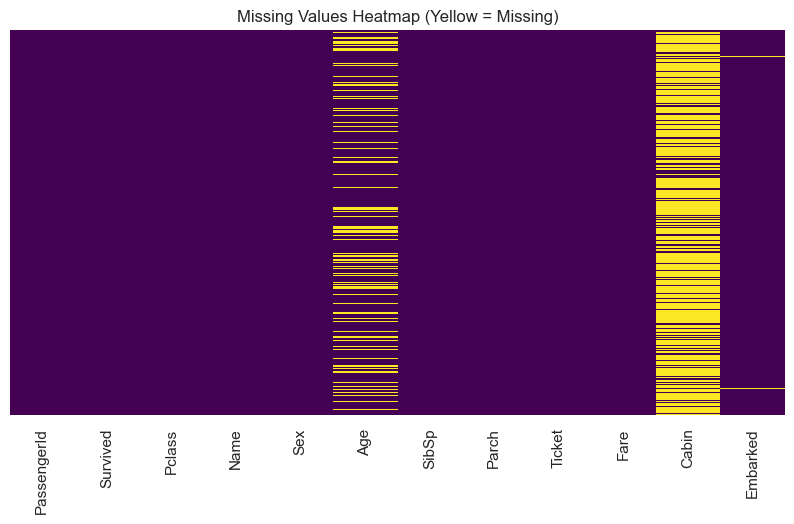

In [12]:
missing = df.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values Heatmap (Yellow = Missing)")
plt.savefig('./Unit01_Results/04_missing_values.png')
plt.show()

### 2.3 資料清理 (Data Cleaning)
根據 EDA 的結果制定填補策略：
1.  Age：使用中位數 (Median) 填補。
2.  Embarked：使用眾數 (Mode) 填補。
3.  Cabin：缺失太多，直接刪除。

In [13]:
df_clean = df.copy()

median_age = df_clean["Age"].median()
df_clean["Age"] = df_clean["Age"].fillna(median_age)

mode_embarked = df_clean["Embarked"].mode().iloc[0]
df_clean["Embarked"] = df_clean["Embarked"].fillna(mode_embarked)

if "Cabin" in df_clean.columns:
    df_clean = df_clean.drop(columns=["Cabin"])

print("清理後剩餘缺失值數量：", df_clean.isnull().sum().sum())

清理後剩餘缺失值數量： 0


### 2.4 特徵工程 (Feature Engineering)
機器學習模型只能吃數字。我們需要將類別特徵轉換為數值。
這裡使用 One-Hot Encoding 處理 Sex 與 Embarked。

In [14]:
selected_cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
df_proc = df_clean[selected_cols].copy()

print("--- One-Hot Encoding 前 ---")
display(df_proc.head(3))

df_encoded = pd.get_dummies(df_proc, columns=["Sex", "Embarked"], drop_first=True)

print("\n--- One-Hot Encoding 後 ---")
display(df_encoded.head(3))

--- One-Hot Encoding 前 ---


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S



--- One-Hot Encoding 後 ---


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True


### 2.5 相關性分析 (Correlation Analysis)
觀察哪些特徵與目標變數 Survived 最相關。

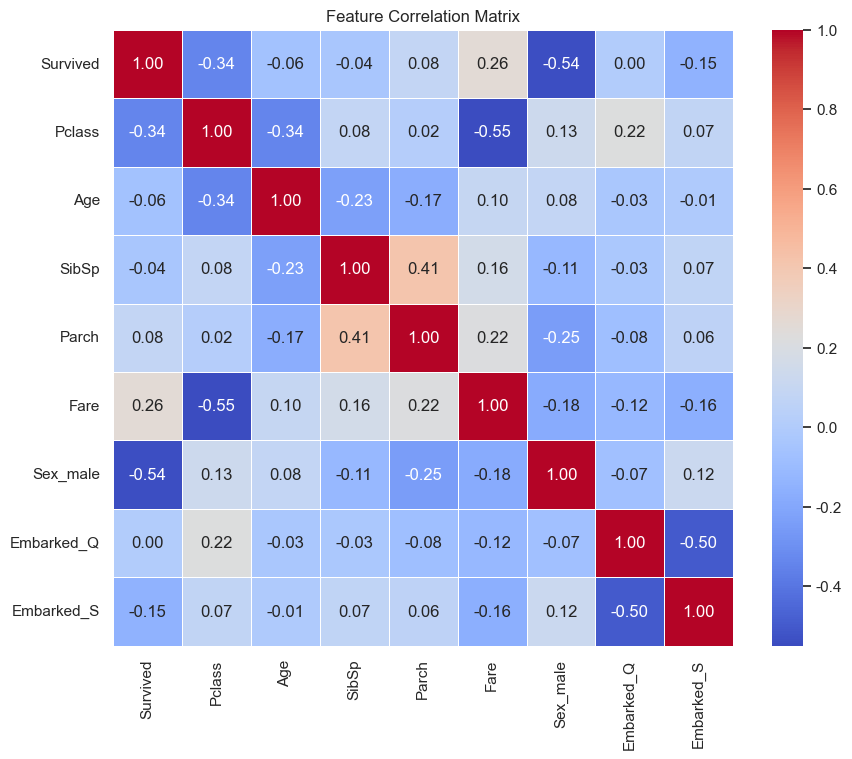

與 Survived 的相關係數：
Survived      1.000000
Fare          0.257307
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.064910
Embarked_S   -0.149683
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64


In [15]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.savefig('./Unit01_Results/05_correlation_matrix.png')
plt.show()

print("與 Survived 的相關係數：")
print(corr_matrix["Survived"].sort_values(ascending=False))


---
## 延伸小案例：簡單批次製程資料的 EDA

此延伸案例示範「多批次最終品質 (Mn_kDa) 與操作變數」的關聯探索，並展示一組典型初步 EDA 步驟：

目標：
- 了解分子量與溫度 / 時間的線性與殘差行為。
- 建立簡易特徵 (偏差量、效率指標) 與分箱比較。
- 快速檢視分佈、相關性、初步線性模型係數。

變數語意（可對照實務）：
- React_Temp：反應溫度 (可對應聚合或酯化等反應的溫控段)。
- React_Time：總反應時間 (可對應停留或批次長度)。
- Agitator_Speed：攪拌速度 (影響傳熱與混合)。
- Mn_kDa：數均分子量 (品質指標)。

分析步驟：
1. 合成批次資料 → 生成 Mn_kDa（含隨機噪音）。
2. 新增偏差特徵：溫度、時間相對目標值的偏差。
3. 探索分佈 (Histogram) 與散佈 + 回歸線。
4. 計算相關係數與熱圖。
5. 建立簡易線性迴歸，檢視係數方向與重要性雛形。
6. 將溫度分箱，觀察各溫度區間對 Mn 分佈差異 (箱型圖)。

延伸思考：
- 若加入觸媒等級、溶劑比例，可擴充為多因子實驗分析。
- 可在後續加上批次階段 (Phase) 時間序列對齊轉成 3D (batch, time, feature)。
- 結果可作為後續建立回歸 / 樹模型 或偏最小二乘 (PLS) 的初始檢查。

後續可量化 KPI：
- Mn 目標達成率 (在目標 ±Δ 內的批次比例)。
- 高溫區間批次是否有較低殘差 / 較少離群。
- 溫度與時間交互作用的統計顯著性（可加多元迴歸或 ANOVA）。

---
### 總結 (Summary)

在本單元中，我們完成了：
1.  NumPy 操作：向量化運算與 Reshape。
2.  時間序列基礎：感測器數據的插值、重採樣與前後填補。
3.  化工數據實戰：反應器壓力數據的降噪與異常偵測，與簡單批次 EDA。
4.  Pandas 綜合實戰：Titanic 資料的清洗、填補與編碼，以及相關性分析。

Next Step：在 Unit 02 中，我們將用這裡處理好的 df_encoded（以及前面的反應器 / 批次示範資料）來建立機器學習模型，
實作決策樹 (Decision Tree) 與其他基礎分類 / 回歸方法。